# Competencia Kaggle 01

Fashion MNIST-ITBA-LAB 2020-Q2

Clasificar las imagenes entre las 10 categorías

# Importo Librerias

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt
from keras.layers.advanced_activations import LeakyReLU

In [3]:
import os
import kaggle
import zipfile as zf

# Descargo dataset

In [4]:
if not os.path.exists('fashion-mnist-itba-lab-2020q2'):
    !kaggle competitions download -c fashion-mnist-itba-lab-2020q2

# Descomprimo dataset

In [5]:
if not os.path.exists("archivo"):
    from zipfile import ZipFile
    file_name = 'fashion-mnist-itba-lab-2020q2.zip'
    with ZipFile(file_name, 'r') as zip:
        zip.extractall(path="archivo")
        zip.close()

# Defino las Clases de mis salidas

In [6]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Dataset

In [7]:
folder = 'archivo/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

# Hago Split de los Datos

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1) #stratify= y

In [9]:
print(y_train, y_valid)

[8. 8. 8. ... 1. 6. 6.] [9. 3. 4. ... 0. 1. 7.]


# One-hot encoding

In [10]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

In [11]:
print(y_train_categorical,"\n",y_val_categorical)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Grafíco el Dataset

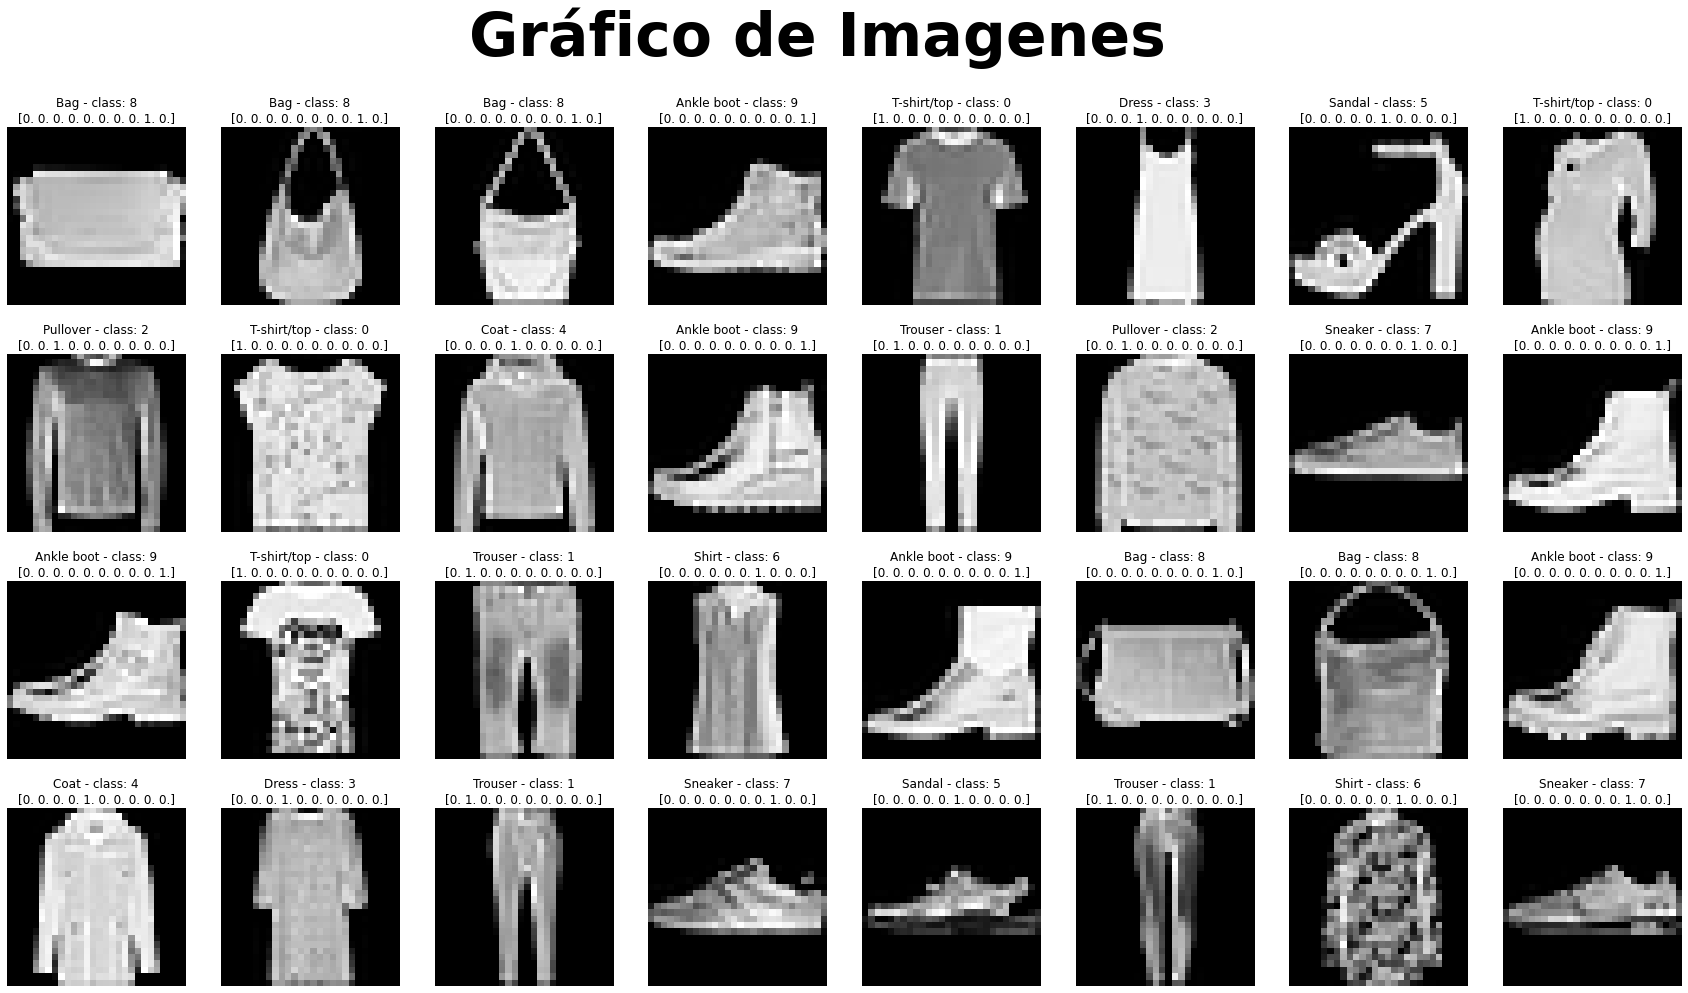

In [12]:
alto = 4
ancho = 8

f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
f.suptitle('Gráfico de Imagenes',fontweight="bold" ,fontsize=60)
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')


# Normalizo los datos

In [13]:
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

# Armo el modelo

In [14]:
model_single_layer = Sequential()

model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))

model_single_layer.add(Dense(784, name='capa1',activation='sigmoid' )) 

model_single_layer.add(Dense(784, name='capa2', activation='sigmoid'))

#model_single_layer.add(Dense(784, name='capa3', activation='sigmoid'))
#model_single_layer.add(Dense(784, name='capa4', activation='sigmoid'))

model_single_layer.add(Dense(10, name='Salida'))
model_single_layer.add(Activation('softmax'))

model_single_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
capa1 (Dense)                (None, 784)               615440    
_________________________________________________________________
capa2 (Dense)                (None, 784)               615440    
_________________________________________________________________
Salida (Dense)               (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [15]:
lr = 0.0002
SGD = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [16]:
checkpointer = ModelCheckpoint(filepath='lab_Kaggle_01.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

In [17]:
batch_size = 1024  
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=200, 
                       batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical),
                       callbacks=[checkpointer]
                      )

Epoch 1/200
53/53 [==============================] - 6s 93ms/step - loss: 2.0998 - accuracy: 0.3315 - val_loss: 1.2642 - val_accuracy: 0.6948

Epoch 00001: val_accuracy improved from -inf to 0.69483, saving model to lab_Kaggle_01.hdf5
Epoch 2/200
53/53 [==============================] - 3s 66ms/step - loss: 1.1150 - accuracy: 0.6994 - val_loss: 0.8330 - val_accuracy: 0.7315

Epoch 00002: val_accuracy improved from 0.69483 to 0.73150, saving model to lab_Kaggle_01.hdf5
Epoch 3/200
53/53 [==============================] - 4s 81ms/step - loss: 0.7818 - accuracy: 0.7429 - val_loss: 0.6815 - val_accuracy: 0.7683

Epoch 00003: val_accuracy improved from 0.73150 to 0.76833, saving model to lab_Kaggle_01.hdf5
Epoch 4/200
53/53 [==============================] - 4s 70ms/step - loss: 0.6673 - accuracy: 0.7663 - val_loss: 0.6070 - val_accuracy: 0.7902

Epoch 00004: val_accuracy improved from 0.76833 to 0.79017, saving model to lab_Kaggle_01.hdf5
Epoch 5/200
53/53 [==============================] 

# Gráfico Loss & Accuracy

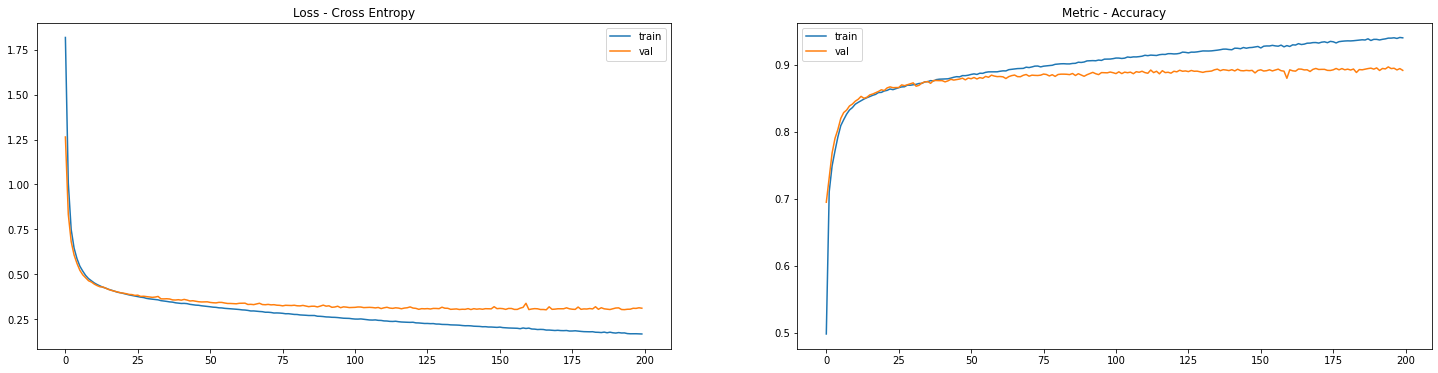

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [19]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.8916666507720947 0.31085100769996643


# Se muestra el mejor score guardado

In [20]:
model_single_layer.load_weights('lab_Kaggle_01.hdf5')

loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print("Mi mejor Accuracy y Loss fue:",acc, loss)

Mi mejor Accuracy y Loss fue: 0.8968333601951599 0.30502110719680786


# Scores Historicos:

0.9016666412353516 0.4173525869846344    epochs=1000 lr= 0.00018  4 capas de 784 neuronas

# Armo CSV para hacer submit a Kaggle